# Night Light Hackathon

The aim of this is to see if we can get time serires data for light to check for blackouts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from osgeo import gdal

### Where is the data?

You can download the data here https://eogdata.mines.edu/products/vnl/#internal_compress

Chose `nighttime_light` then `nightly` then `rade9d` for the night time data. 

In [3]:
# This loads the data and then outputs in to a numpy array.
# I belive it would be faster if only the relavent data was loaded to
# memory which I belive is possible in gdal.

gdal_dataset = gdal.Open("SVDNB_npp_d20230210.rade9d.tif", gdal.GA_ReadOnly)
img_array = gdal_dataset.GetRasterBand(1).ReadAsArray()

In [4]:
# This selects just the india data and clips to the useful range

india_data = img_array[100_00:170_00:5, 590_00:650_00:5]
india_clip = np.clip(india_data, 0, 20)

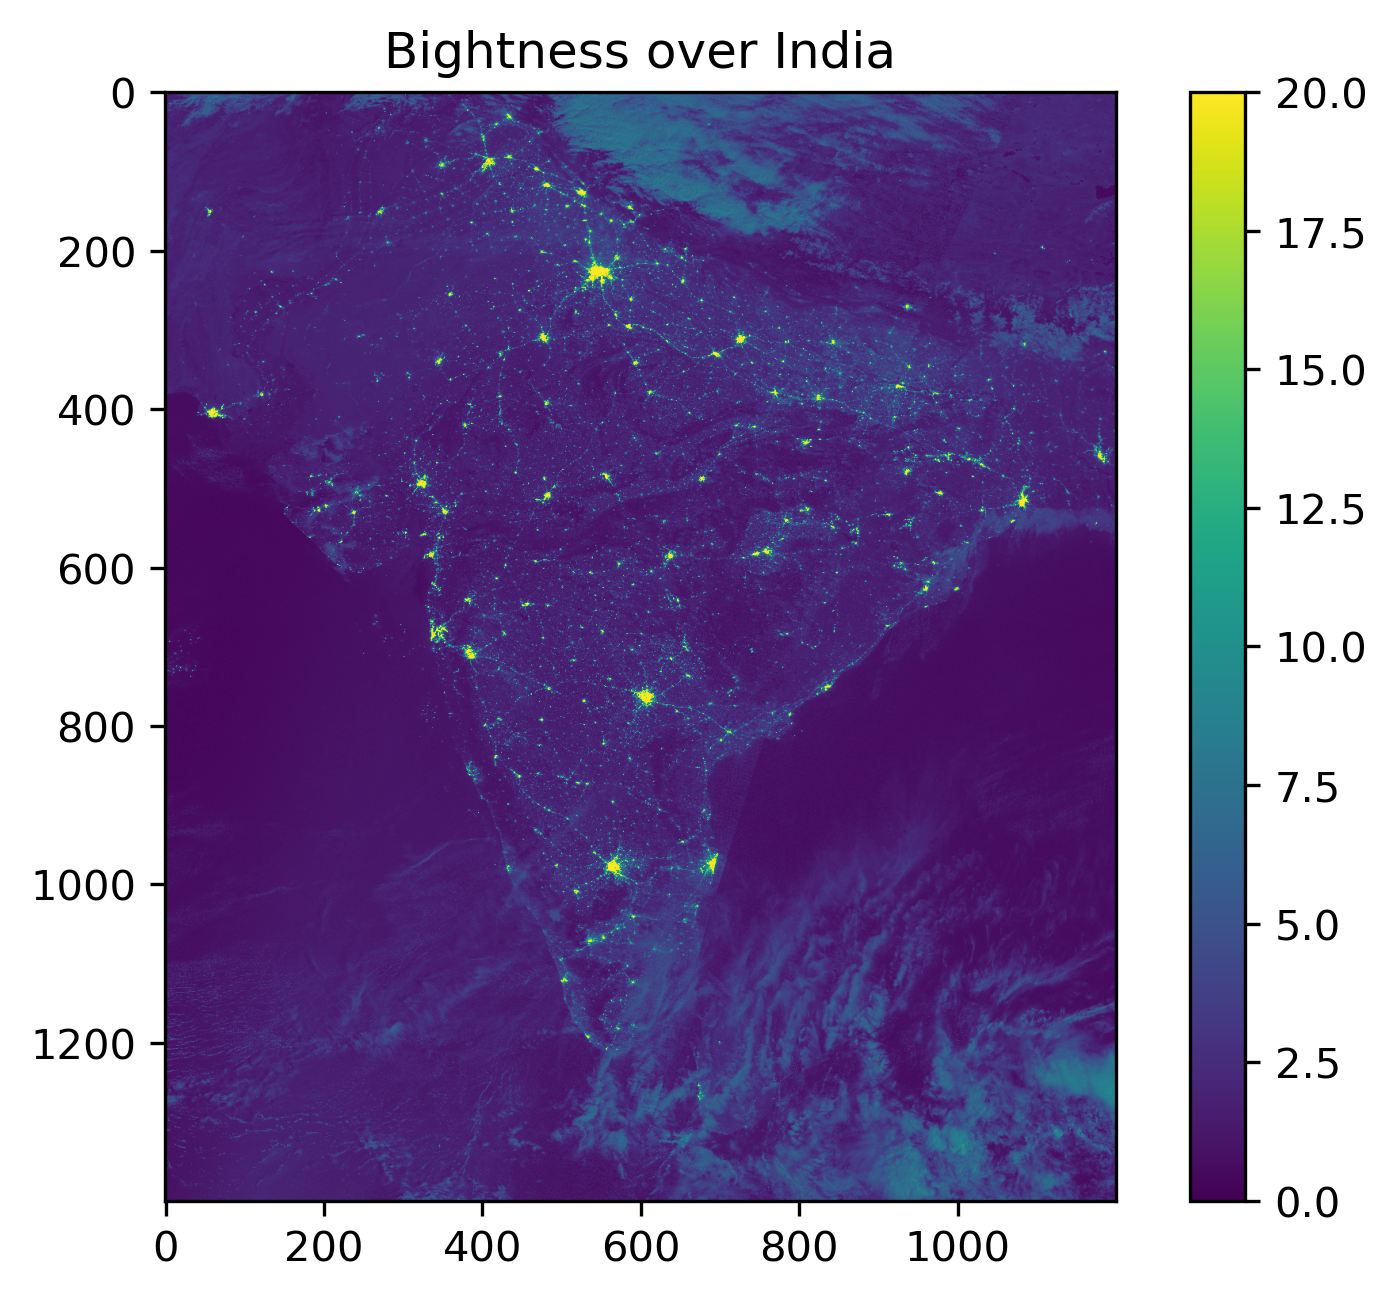

In [5]:
plt.figure(dpi=300)
plt.title("Bightness over India")
plt.imshow(india_clip)
plt.colorbar()

plt.savefig("Night_image.png")

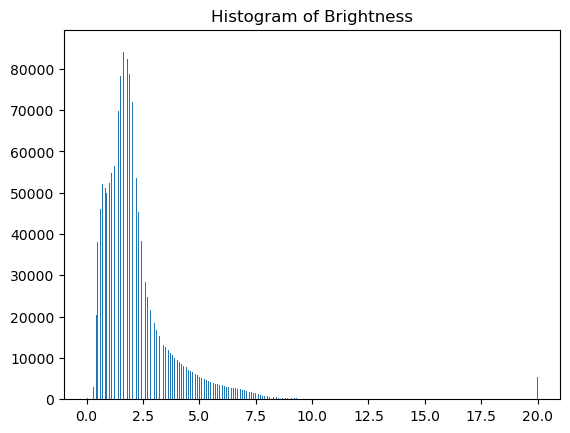

In [6]:
plt.title("Histogram of Brightness")
plt.hist(india_clip.flatten(), bins=500)
plt.savefig("Histogram.png")
plt.show()


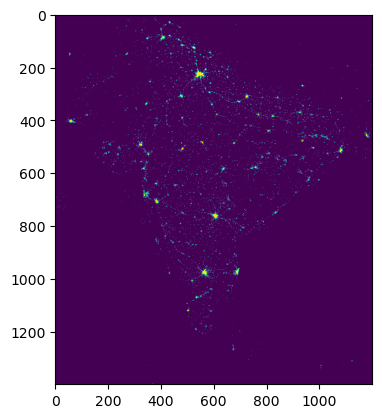

In [7]:
## This shows that the values greater than 10 seam to be all cities
plt.imshow((india_clip>10).astype(np.int_))

plt.show()

## Clouds

It is important to see if there are clouds as they will hide the lights.

In [8]:
gdal_clouds = gdal.Open("SVDNB_npp_d20230210.vcld.tif", gdal.GA_ReadOnly)
clouds_array = gdal_clouds.GetRasterBand(1).ReadAsArray()
india_clouds = clouds_array[100_00:170_00:5, 590_00:650_00:5]

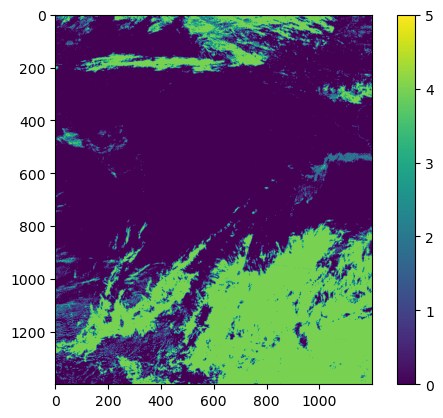

In [10]:
plt.imshow(india_clouds, vmin=0, vmax=5)
plt.colorbar()